In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
import pandas as pd
df=pd.read_csv(r'C:\PythonSuretrust\weather_classification_data.csv',encoding='latin1')
df.head(20)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [3]:
df.shape

(13200, 11)

In [4]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [5]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [6]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

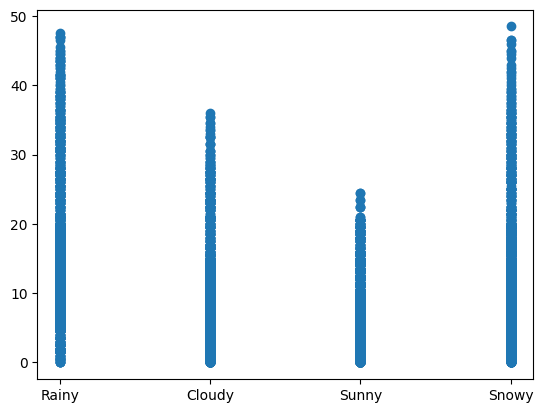

In [7]:
plt.scatter(x='Weather Type',y='Wind Speed',data=df)

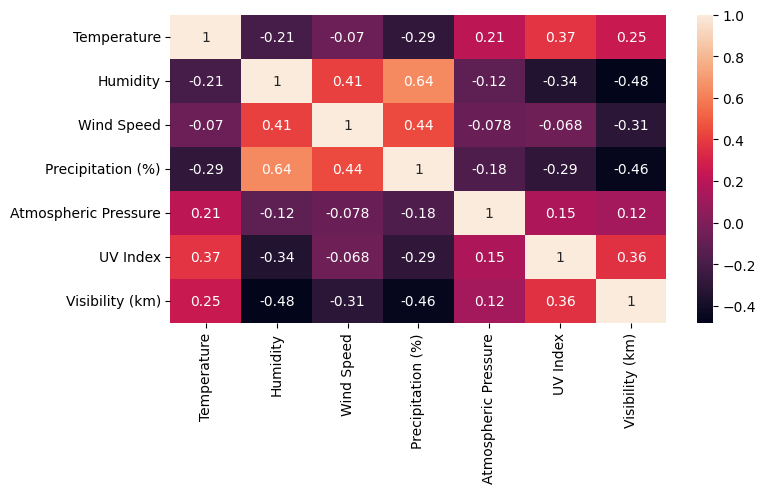

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

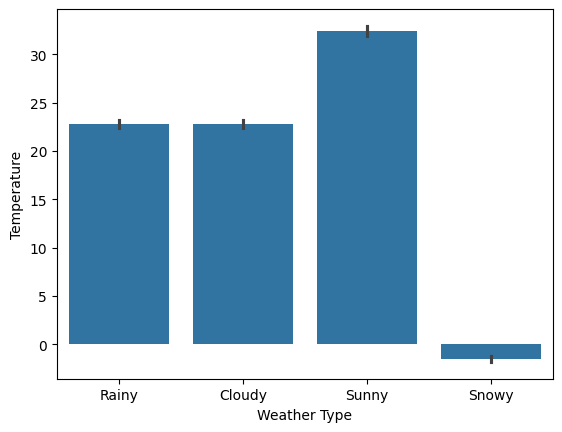

In [9]:
sns.barplot(data=df,x='Weather Type',y='Temperature')
plt.show

In [10]:
X=df.drop('Weather Type',axis=1)
y=df['Weather Type']

In [11]:
le=LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([1, 0, 3, ..., 0, 2, 1], shape=(13200,))

In [12]:
cols=['Cloud Cover','Season','Location']

In [13]:
ohe= OneHotEncoder(sparse_output=False)

x_ohe=ohe.fit_transform(X[cols])

cat_feature_names = ohe.get_feature_names_out(cols)
x_ohe = pd.DataFrame(x_ohe, columns=cat_feature_names)
x_ohe



,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
13195,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
13197,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
numerical_cols = []

for col in X.columns:
    if col not in cols:
        numerical_cols.append(col)

scaler=StandardScaler()

X_num_scaled = scaler.fit_transform(X[numerical_cols])

X_num_scaled = pd.DataFrame(X_num_scaled, columns=numerical_cols)
X_num_scaled

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846
...,...,...,...,...,...,...,...
13195,-0.525006,0.261924,0.675666,0.543291,-0.071990,-0.779410,-1.323769
13196,-1.157711,0.360966,-0.916588,-0.959276,1.650675,-0.779410,0.159307
13197,0.625367,0.410487,-0.627087,-0.802759,0.184474,-0.260799,1.049153
13198,-0.927636,0.360966,0.024290,1.263271,-0.579542,-1.038715,-1.027154


In [15]:
X_final = pd.concat([X_num_scaled, x_ohe], axis=1)
X_final



,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,-0.525006,0.261924,0.675666,0.543291,-0.071990,-0.779410,-1.323769,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13196,-1.157711,0.360966,-0.916588,-0.959276,1.650675,-0.779410,0.159307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
13197,0.625367,0.410487,-0.627087,-0.802759,0.184474,-0.260799,1.049153,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13198,-0.927636,0.360966,0.024290,1.263271,-0.579542,-1.038715,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_encoded,test_size=0.7,random_state=42)


In [17]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn

array([3, 3, 3, ..., 1, 1, 1], shape=(9240,))

In [19]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)

knn_accuracy=accuracy_score(y_test,y_pred_knn)

In [20]:
lr_accuracy

0.8691558441558441

In [21]:
knn_accuracy

0.883982683982684

In [22]:
confusion_matrix(y_test, y_pred_lr)



array([[1958,  212,   88,   66],
       [ 162, 1953,  166,   44],
       [  72,   36, 2147,   56],
       [ 182,   58,   67, 1973]])

In [23]:
report = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df

,precision,recall,f1-score,support
0,0.824768,0.842513,0.833546,2324.000000
1,0.864542,0.840000,0.852094,2325.000000
2,0.869935,0.929035,0.898514,2311.000000
3,0.922394,0.865351,0.892962,2280.000000
accuracy,0.869156,0.869156,0.869156,0.869156
macro avg,0.870410,0.869225,0.869279,9240.000000
weighted avg,0.870162,0.869156,0.869123,9240.000000
